# Bank Churners Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modelagem

from sklearn.model_selection import KFold, GridSearchCV, train_test_split, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report


In [2]:
dados = pd.read_csv('C:/Users/mcaio/Desktop/Cogumelos_classificação/BankChurners.csv')

In [3]:
dados.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


In [5]:
dados.shape

(10127, 23)

In [6]:
dados.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [7]:
dados.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
          axis = 1, inplace = True)

### EDA

In [6]:
dados.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

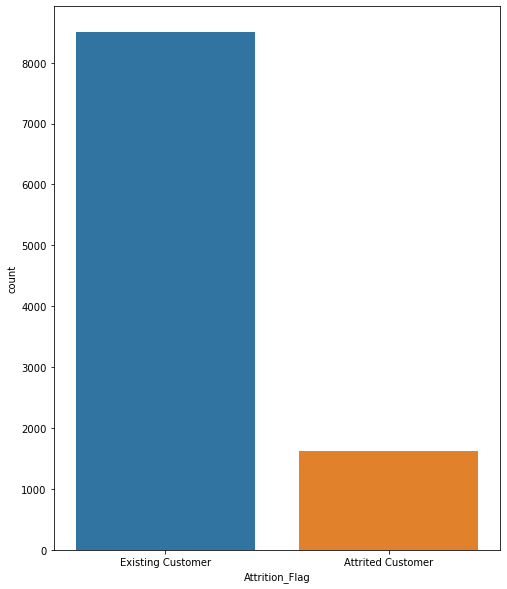

In [13]:
plt.subplots(figsize = (8,10))

sns.countplot(data = dados, x = 'Attrition_Flag')

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

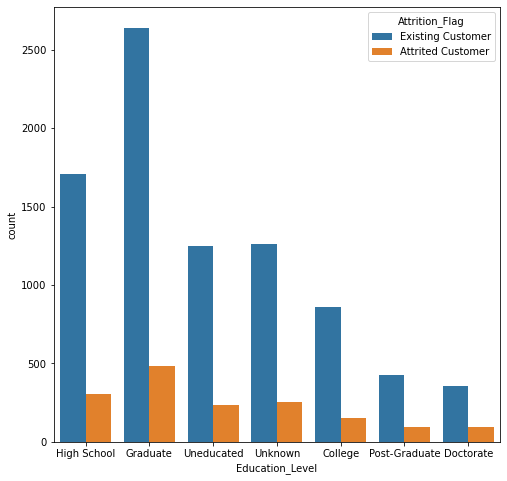

In [24]:
plt.subplots(figsize=(8,8))

sns.countplot(data = dados, x = 'Education_Level', hue= 'Attrition_Flag')

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

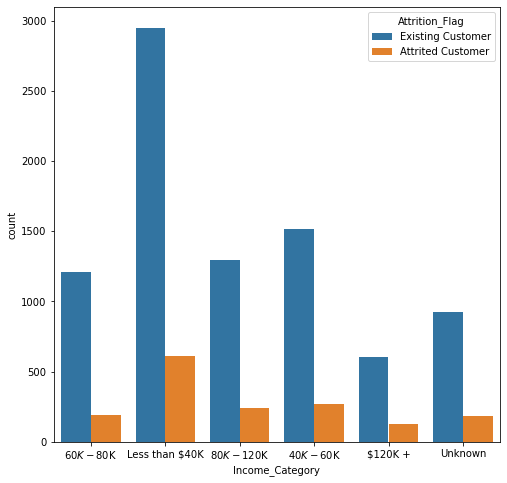

In [27]:
plt.subplots(figsize=(8,8))

sns.countplot(data = dados, x = 'Income_Category', hue= 'Attrition_Flag')

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

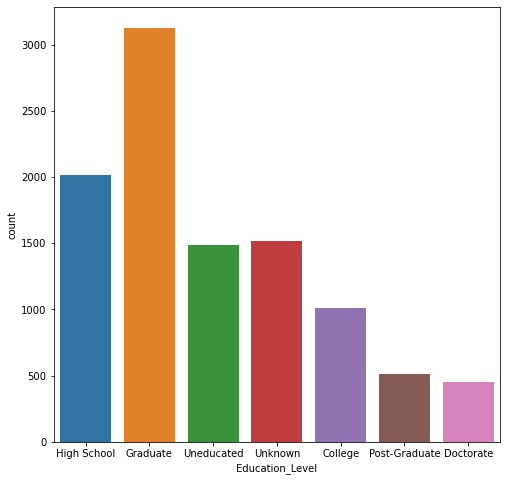

In [25]:
plt.subplots(figsize=(8,8))

sns.countplot(data = dados, x = 'Education_Level')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

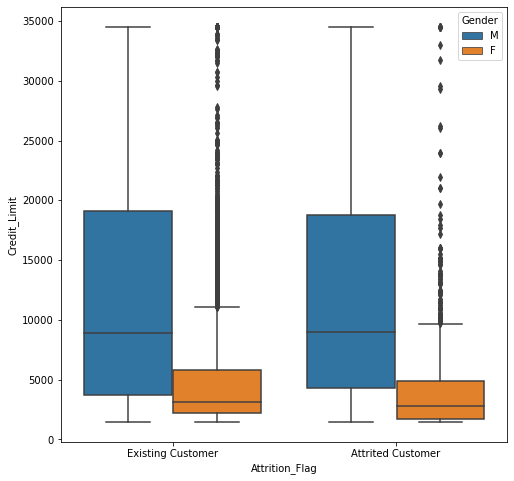

In [21]:
plt.subplots(figsize=(8,8))

sns.boxplot(data = dados, x = 'Attrition_Flag', y = 'Credit_Limit', hue = 'Gender' )

<AxesSubplot:>

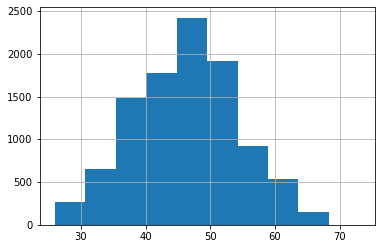

In [22]:
dados['Customer_Age'].hist()

In [30]:
dados.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [37]:
dados.groupby('Attrition_Flag').agg({'Customer_Age': ['min','max','median','mean'], 'Credit_Limit':['min','max','median','mean'], 'Avg_Utilization_Ratio':['min','max','median','mean']})

Customer_Age                       Credit_Limit           \
                           min max median       mean          min      max   
Attrition_Flag                                                               
Attrited Customer           26  68     47  46.659496       1438.3  34516.0   
Existing Customer           26  73     46  46.262118       1438.3  34516.0   

                                       Avg_Utilization_Ratio                \
                   median         mean                   min    max median   
Attrition_Flag                                                               
Attrited Customer  4178.0  8136.039459                   0.0  0.999  0.000   
Existing Customer  4643.5  8726.877518                   0.0  0.994  0.211   

                             
                       mean  
Attrition_Flag               
Attrited Customer  0.162475  
Existing Customer  0.296412

##  Modelagem dos dados

In [8]:
dados['Attrition_Flag'].replace('Existing Customer', 0, inplace = True)
dados['Attrition_Flag'].replace('Attrited Customer', 1, inplace = True)

In [9]:
feature = dados.drop('Attrition_Flag', axis = 1)
resposta = dados['Attrition_Flag']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(feature, resposta, test_size = 0.2, random_state = 42)

In [8]:
dados.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [14]:
print(x_train['Marital_Status'].mode()[0])
print(x_train['Income_Category'].mode()[0])
print(x_train['Education_Level'].mode()[0])

Married
Less than $40K
Graduate


In [16]:
for i in [x_train]:
    i['Marital_Status'].fillna(i['Marital_Status'].mode()[0], inplace = True)
    i['Income_Category'].fillna(i['Income_Category'].mode()[0], inplace = True)
    i['Education_Level'].fillna(i['Education_Level'].mode()[0], inplace = True)

In [15]:
for i in [x_test]:
    i['Marital_Status'].fillna('Married', inplace = True)
    i['Income_Category'].fillna('Less than $40K', inplace = True)
    i['Education_Level'].fillna('Graduate', inplace = True)

C:\Users\mcaio\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [17]:
col_categorico = [coluna for coluna in x_train.columns if x_train[coluna].dtype.name == 'object']

In [18]:
categorico = ColumnTransformer([
    ('encoder', OneHotEncoder(handle_unknown= 'ignore'), col_categorico),
], remainder = 'passthrough')

modelo = RandomForestClassifier(class_weight = {0:4, 1:6},random_state = 42)

pipe = Pipeline([
    ('cat', categorico),
    ('algoritmo', modelo)
])

In [19]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('cat',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category'])])),
                ('algoritmo',
                 RandomForestClassifier(class_weight={0: 4, 1: 6},
                                        random_state=42))])

In [20]:
val_cruzada = KFold(n_splits = 5, shuffle = True, random_state = 53)

In [21]:
cross_validate(pipe, x_train, y_train, cv = val_cruzada, scoring = ['recall', 'precision', 'accuracy'])

{'fit_time': array([1.66647482, 1.80835271, 1.61499715, 1.60822678, 1.60024905]),
 'score_time': array([0.0721817 , 0.07724094, 0.07061005, 0.06896019, 0.08690381]),
 'test_recall': array([0.75686275, 0.71146245, 0.77692308, 0.74409449, 0.73381295]),
 'test_precision': array([0.92344498, 0.92307692, 0.94835681, 0.96923077, 0.94444444]),
 'test_accuracy': array([0.95188155, 0.94567901, 0.95740741, 0.95617284, 0.94691358])}

### Tunando os Hiperparametros

In [22]:
modelo.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [23]:
params = {'algoritmo__min_samples_split': [4,6,10,13],  # usar 2 (DOIS) __
          'algoritmo__min_samples_leaf': [4,7,10,15],
          'algoritmo__max_features': ['auto', 'sqrt'],
          'algoritmo__max_depth': [10,20,30,50],
          'algoritmo__n_estimators': [10, 20, 30, 50]}


rf_grid = GridSearchCV(estimator= pipe, 
                      param_grid= params, 
                      scoring = 'accuracy',
                      cv = 3,
                      n_jobs= -1)

In [24]:
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cat',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'Education_Level',
                                                                          'Marital_Status',
                                                                          'Income_Category',
                                                                          'Card_Category'])])),
                                       ('algoritmo',
                                        RandomForestClassifier(class_weight={0: 4,
                                                            

### Validação cruzada após a tunagem

#### Vamos selecionar os melhores valores para os parametros

In [25]:
print(rf_grid.score(x_train, y_train))

0.9855573386001728


In [156]:
rf_grid.best_params_

{'algoritmo__max_depth': 20,
 'algoritmo__max_features': 'auto',
 'algoritmo__min_samples_leaf': 4,
 'algoritmo__min_samples_split': 4,
 'algoritmo__n_estimators': 50}

In [157]:
# Atualizando o modelo com os valores fornecidos pelo Grid Search

modelo = RandomForestClassifier(random_state = 53,class_weight={0:4,1:6},
                               max_depth = 20,
                               max_features = 'auto',
                               min_samples_leaf = 4,
                               min_samples_split = 4,
                               n_estimators = 50)


# pipeline com o algoritmo e a transformação das variaveis
pipe = Pipeline([
    ('cat', categorico),
    ('algoritmo', modelo)
])

In [26]:
val_cruzada = KFold(n_splits = 5, shuffle = True, random_state = 53)

In [27]:
cross_validate(rf_grid, x_train, y_train, cv = val_cruzada, scoring = ['recall', 'precision', 'accuracy'])

{'fit_time': array([250.13535833, 259.35082674, 267.79227066, 253.38870406,
        261.3668654 ]),
 'score_time': array([0.03070068, 0.06475306, 0.05058908, 0.05186057, 0.04071188]),
 'test_recall': array([0.75686275, 0.74703557, 0.78076923, 0.76771654, 0.74460432]),
 'test_precision': array([0.86936937, 0.88317757, 0.92694064, 0.92417062, 0.85892116]),
 'test_accuracy': array([0.94386181, 0.94506173, 0.95493827, 0.9537037 , 0.93518519])}

### Vamos a base de teste

In [29]:
final_model = rf_grid.best_estimator_

In [30]:
y_pred = final_model.predict(x_test)

In [31]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.9157509157509157
0.764525993883792
0.8333333333333334
0.9506416584402764
[[1676   23]
 [  77  250]]


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1699
           1       0.92      0.76      0.83       327

    accuracy                           0.95      2026
   macro avg       0.94      0.88      0.90      2026
weighted avg       0.95      0.95      0.95      2026

